In [2]:
import pandas as pd
from sdv.single_table import TVAESynthesizer

from domias.evaluator import evaluate_performance
from domias.models.generator import GeneratorInterface
from domias.models.ctgan import CTGAN



from scipy import stats
from scipy.stats import multivariate_normal


import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing, fetch_covtype, load_digits

import warnings
warnings.filterwarnings("ignore")

[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [6]:
#Read in UCI dataset
df_uci = pd.read_csv(r'C:\Users\jordy\OneDrive\MSc_Python\Individual_Project\Data\UCI_Credit_Card.csv')

#convert dataframe to array
arr_uci = np.array(df_uci.iloc[:, 1:])

In [7]:
#Define data loader
def get_dataset() -> np.ndarray:
    def data_loader() -> np.ndarray:
        scaler = StandardScaler()
        X =arr_uci
        np.random.shuffle(X)
        return scaler.fit_transform(X)

    return data_loader()

p_G_evaluated
[3.23191695e-012 4.50708947e-004 4.24893410e-005 2.90887303e-006
 2.62550535e-007 2.57839168e-003 6.87649588e-017 4.98402438e-007
 3.75486898e-013 4.31514477e-005 9.10352905e-022 3.37100372e-003
 4.59148717e-010 5.30964523e-006 3.11304212e-003 8.77889593e-007
 1.31063279e-018 3.63828462e-015 2.24663300e-009 2.05776100e-006
 4.60582597e-006 2.43026553e-004 7.86986542e-004 1.59116639e-006
 1.11029131e-003 1.56484766e-003 9.22839733e-005 1.61128268e-004
 1.42116419e-003 4.59268892e-006 1.37241962e-013 1.49973804e-005
 1.50112038e-010 2.88402648e-005 6.84673208e-008 6.32692115e-004
 5.89074858e-004 1.38624475e-011 7.61305256e-011 7.93688024e-006
 6.56116454e-024 4.56665109e-005 7.10371778e-005 7.66523028e-006
 1.00707199e-004 1.01493198e-003 2.17215116e-003 2.66278207e-008
 6.95328012e-004 3.23640403e-037 1.81269000e-002 1.41982943e-003
 1.03552597e-006 3.30751408e-005 3.87123549e-121 9.74626748e-005
 6.35394922e-026 2.36461308e-009 6.74109349e-005 1.83765708e-003
 2.88015374

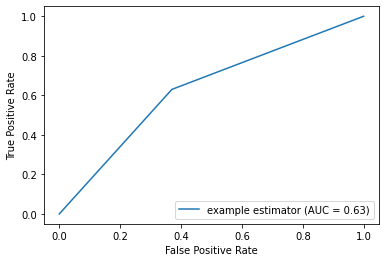

fpr: [0.   0.37 1.  ]
tpr: [0.   0.63 1.  ]
p_G_evaluated
[1.02078219e-027 7.63939116e-006 3.46741271e-006 7.08463044e-008
 5.22894061e-054 4.33396669e-007 3.05456746e-088 3.95123728e-011
 2.64224300e-008 3.34544733e-009 1.23460615e-019 2.23170353e-006
 7.89255033e-010 5.86893323e-007 9.04295120e-006 3.84790965e-006
 4.68632165e-011 9.75211057e-033 1.40499330e-007 3.99043697e-007
 1.28402283e-010 1.67320986e-006 9.56554068e-007 2.61664073e-008
 2.60630143e-006 1.48888759e-004 4.19350195e-007 1.85253769e-007
 2.24469262e-006 8.40986649e-007 5.39206321e-013 4.92226987e-008
 1.37954070e-015 4.21932239e-009 2.06990737e-007 1.26107340e-005
 1.15402328e-008 1.33783530e-014 1.43317793e-009 8.29095448e-009
 8.57311702e-028 1.31046413e-005 2.01995415e-007 5.14658895e-006
 8.92562710e-010 4.11462916e-007 3.91636826e-005 9.76515418e-011
 1.57894399e-005 6.77041791e-013 5.00454120e-004 8.78372101e-005
 1.93456171e-007 5.86648410e-005 5.35302180e-041 1.13558048e-005
 4.76871997e-036 3.21609452e-013

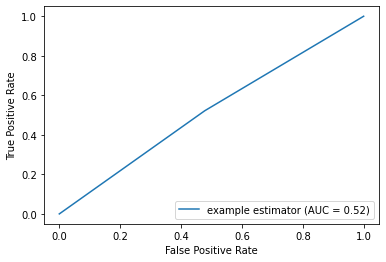

fpr: [0.    0.478 1.   ]
tpr: [0.    0.522 1.   ]
p_G_evaluated
[1.02842762e-26 5.03981653e-07 4.99461223e-06 ... 5.43074419e-11
 2.94887128e-10 5.68928478e-12]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 1.37183021e-10
 3.96664044e-09 2.26722608e-12]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.195228 -1.234323  0.188478 -1.054145  2.042864  0.898988  1.770585   
1    2.370650  0.806824  0.186303 -1.061880  2.495095  0.014442  0.116519   
2    0.596133  0.809390 -1.078845 -1.055057  0.996632 -0.872837 -1.541459   
3   -0.917864  0.808720  0.188576 -1.052993 -0.964201  0.016471  0.112334   
4   -0.960816  0.810161  0.185528 -1.054960 -0.997047  0.016127  0.110497   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.695775  0.809297  1.461686 -1.061378  1.619604  0.018898  0.112142   
496 -0.271281 -1.233632  1.439287 -1.060089  1.885052  0.015464  0.113137   
497 -0.156342  0.81

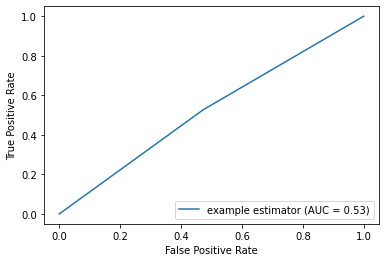

fpr: [0.    0.473 1.   ]
tpr: [0.    0.527 1.   ]
p_G_evaluated
[2.04774161e-31 9.71793355e-06 4.75134640e-06 ... 2.91641210e-08
 7.83025638e-25 1.27540796e-05]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 4.26358587e-08
 1.11542872e-14 5.69280296e-06]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.719178  0.808341 -1.077519  0.859633 -0.900878  0.014893  0.111369   
1   -0.924863  0.808654  0.185374  0.859208 -1.031851  0.014319  0.113200   
2   -0.646481  0.808463  0.185917 -1.055031  1.048633  0.014820  0.113197   
3    0.832596  0.809200 -1.080512  0.861471 -0.929449  0.015570  0.112224   
4   -1.155198 -1.230329  0.185932 -1.054455  0.418394  1.794098  1.776555   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.722285  0.809189  0.187392 -1.059551  2.236066 -0.871395 -1.558876   
496  1.123056  0.809237  0.183910 -1.056498  1.553274 -0.873859 -0.722204   
497 -0.497127  0.81

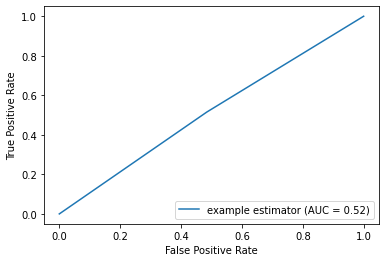

fpr: [0.         0.48466667 1.        ]
tpr: [0.         0.51533333 1.        ]
p_G_evaluated
[4.76042341e-30 1.62500845e-06 5.67792995e-08 ... 2.05800337e-11
 8.60240604e-04 1.62193438e-15]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 8.36805440e-09
 2.07758340e-05 2.08231271e-09]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.065520  0.809150 -1.078012  0.859135 -0.438696 -0.874413 -0.724267   
1   -0.922577  0.809266  0.185621  0.858371 -1.020822  2.645744  1.779193   
2   -1.074824  0.809378  0.185810  0.859310 -0.890427  0.014948  0.112804   
3   -1.006740  0.809530  0.185739  0.859592 -0.894666  0.906021  1.780983   
4   -1.151601  0.810161  0.185975  0.859769 -1.360045  0.015415  0.110644   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.039379  0.810161 -1.076248  0.857636 -0.534660 -0.873209 -0.725156   
496 -0.738443  0.809950  0.184302  0.858658 -0.763881  0.015191  0

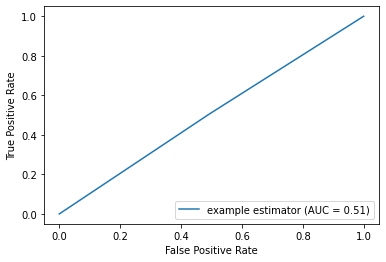

fpr: [0.     0.4938 1.    ]
tpr: [0.     0.5062 1.    ]
p_G_evaluated
[5.37893864e-22 1.23919626e-05 1.02905518e-06 ... 1.59541614e-08
 4.14935220e-05 9.25989773e-08]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 1.11516988e-06
 1.32587019e-05 1.08929324e-06]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.936814 -1.234323  0.186279  0.859327 -0.549429 -0.873568  0.111649   
1    0.408520  0.809456  0.185449 -1.056858  0.043436  0.014578  0.112437   
2    0.164287  0.809431 -1.079127  0.859246 -0.802678  0.014799  0.112708   
3    0.275654  0.809875 -1.078773  0.859614 -0.845686  0.904452 -1.558876   
4   -0.939399  0.810161 -1.079467  0.859579 -0.945265  0.015307  0.110903   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.997499  0.810161  0.187026  0.857412 -0.637231  0.906844  1.779365   
496  0.109974  0.810045 -1.080855  0.858576 -0.677909  0.904935  1.781872   
497 -0.641706

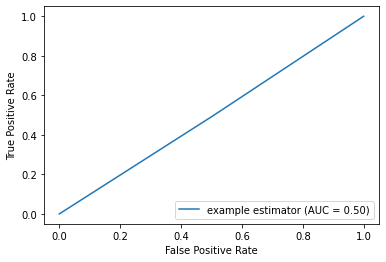

fpr: [0.         0.50428571 1.        ]
tpr: [0.         0.49571429 1.        ]
p_G_evaluated
[3.42849378e-24 1.88479629e-06 9.41060701e-10 ... 3.36241340e-12
 2.22349427e-11 1.61420024e-10]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 1.97567469e-07
 1.10580461e-09 1.97969204e-07]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.353204  0.809325 -1.078547  0.858478  0.132964 -0.874323 -0.723975   
1    0.373302  0.809485  0.185825 -1.058167  2.564453  0.014662  0.112419   
2   -0.914329  0.809506  0.185855  0.858803 -1.286434  0.015070  0.112747   
3   -0.894028  0.809787  0.185902 -1.056458 -0.318308  0.015275  0.112000   
4   -0.932592  0.810161  0.185853  0.858927 -0.952898  0.015171  0.111093   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.982160  0.810097  0.187011  0.857340 -0.633223  1.796581  1.779464   
496  0.110401  0.809859  0.185067 -1.057304 -0.126223  0.015086  0

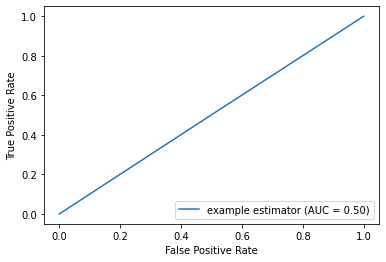

fpr: [0.     0.4993 1.    ]
tpr: [0.     0.5007 1.    ]
p_G_evaluated
[5.23791760e-024 1.18116322e-004 1.55397845e-004 2.38812367e-007
 1.15873780e-032 1.78036748e-003 2.87369561e-020 2.63411200e-008
 1.32208546e-010 1.87633693e-004 2.11671632e-025 9.67944300e-005
 5.03197398e-011 1.82984041e-005 1.68167952e-003 1.84704194e-004
 1.20013283e-016 2.72529566e-014 3.96249125e-005 4.62196410e-005
 1.09219674e-004 1.35164616e-005 8.47184819e-004 1.55138248e-005
 3.85250625e-005 3.79777398e-003 4.24513884e-004 5.80444985e-007
 2.27633327e-003 3.97223699e-007 1.14380663e-008 2.44244176e-006
 4.83706577e-014 6.25194570e-007 1.09205131e-006 1.70825760e-003
 9.55067685e-005 6.61405072e-011 3.75012286e-012 7.87975815e-004
 1.79065629e-039 2.81751595e-005 1.93312463e-004 6.39268455e-004
 1.03977808e-006 8.92266360e-005 5.25154358e-003 4.17847931e-008
 6.64006051e-003 2.14468734e-029 2.43382522e-002 2.60038564e-003
 4.27691171e-006 1.93808928e-003 1.28283856e-100 5.60187496e-003
 5.63596787e-014 1.9

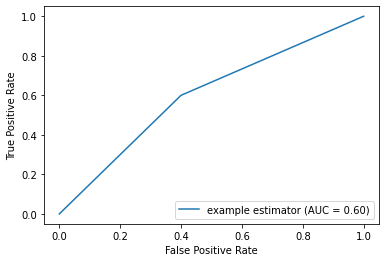

fpr: [0.  0.4 1. ]
tpr: [0.  0.6 1. ]
p_G_evaluated
[1.39689298e-019 5.48493387e-005 1.61348909e-006 1.46420893e-008
 3.17623454e-035 1.82408848e-006 7.39546751e-046 5.76040800e-010
 1.22716378e-009 3.63808295e-009 8.13518837e-020 1.04309085e-006
 3.12557402e-014 1.66423837e-007 9.57375641e-006 2.69588936e-007
 2.79948021e-008 8.63239651e-012 1.43147730e-009 3.90914891e-009
 2.22434942e-009 1.29041117e-006 2.39773023e-005 5.65027336e-008
 1.51528973e-006 6.48616986e-005 1.63239667e-007 3.36374628e-005
 5.23145950e-008 2.49689695e-007 3.29545899e-012 7.93560815e-008
 1.21360040e-015 6.18976520e-009 1.73559661e-008 3.07077466e-006
 1.07400999e-009 4.70340956e-016 2.52859472e-013 1.06707214e-007
 1.51382431e-016 9.06715986e-006 1.20275893e-007 1.08562068e-005
 5.19551656e-009 2.96632023e-007 3.61360961e-005 3.47980349e-010
 1.04393028e-005 4.31133712e-013 4.06470998e-004 1.51918609e-005
 4.16187229e-008 4.67509870e-005 1.91598475e-035 2.44947037e-005
 1.77771426e-027 1.38970558e-010 2.557

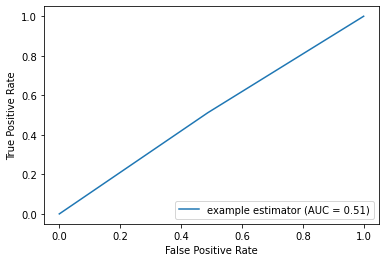

fpr: [0.    0.488 1.   ]
tpr: [0.    0.512 1.   ]
p_G_evaluated
[8.02424015e-27 7.28414966e-07 1.60626393e-07 ... 4.23199775e-11
 6.61625894e-12 2.88301850e-12]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 1.37183021e-10
 3.96664044e-09 2.26722608e-12]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.374382  0.808628  0.186912 -1.057201  1.887688  0.015114  0.111376   
1   -0.946773 -1.234323  0.181195 -1.054824  2.040554  0.012874  0.113135   
2    1.272211  0.807650  0.185708  0.859920 -0.887720  0.014758  0.114837   
3   -0.889313  0.808822  0.189536  0.862773 -1.055742  1.788869  1.781481   
4   -0.314959  0.810161  0.185103 -1.051392 -1.169564  0.015408  0.109238   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.279955  0.809661 -1.078166 -1.060311  0.297020  0.015657  0.108235   
496 -1.186714  0.808474  0.182477  0.861827 -1.167396 -0.868965  1.785002   
497 -1.154974  0.81

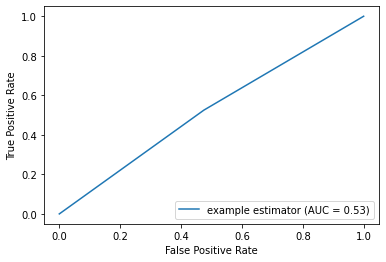

fpr: [0.    0.475 1.   ]
tpr: [0.    0.525 1.   ]
p_G_evaluated
[1.45291494e-22 1.42756228e-05 3.86362161e-06 ... 1.14399969e-07
 1.16753392e-44 1.03698564e-05]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 4.26358587e-08
 1.11542872e-14 5.69280296e-06]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.208556 -1.234323  0.186748 -1.055212 -0.919425  0.014378  0.111596   
1    2.313723  0.808521  0.185259  0.858117  0.706530  0.013688  0.112733   
2   -1.069741 -1.234323  0.185798  0.859139 -1.181084  0.014073  0.113318   
3    1.357061  0.809299  0.185435  0.859974 -1.207684  0.015092  0.111982   
4   -1.143135 -1.229873  0.185653  0.860330 -1.460690  0.015018  0.110254   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.290018  0.809685 -1.076422  0.857452 -0.555008 -1.759920 -1.558876   
496 -0.050564  0.809403  0.184417 -1.056716  1.553029  0.015069  0.112646   
497 -0.580048  0.81

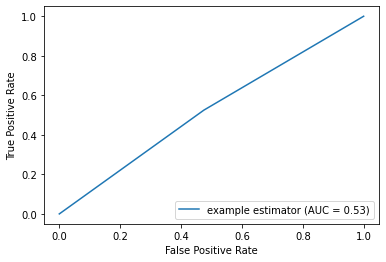

fpr: [0.    0.475 1.   ]
tpr: [0.    0.525 1.   ]
p_G_evaluated
[2.85513586e-24 1.17538453e-05 8.83757430e-07 ... 5.48231823e-07
 2.64363853e-04 8.54693214e-10]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 8.36805440e-09
 2.07758340e-05 2.08231271e-09]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.140677  0.808991 -1.077781  0.859351 -0.629264  0.015106  1.780293   
1   -0.897746  0.809077  1.450536 -1.057264  2.393553  1.791953  1.787247   
2    0.914310  0.809227 -1.078736  0.859378 -0.205933  0.014818  0.113042   
3   -0.534761  0.809502 -1.078836  0.859701 -0.864087  0.015670  1.782787   
4   -0.732134  0.810161  0.186226 -1.055686  0.044091  0.015326  0.111031   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.040336  0.810161  0.187582 -1.058504  1.385091  0.015557  0.111161   
496 -0.793146  0.809722 -1.080588  0.858547 -0.722503  0.904712  1.783961   
497 -1.022984  0.81

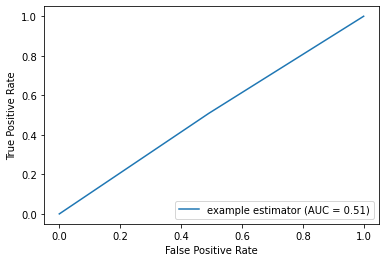

fpr: [0.     0.4912 1.    ]
tpr: [0.     0.5088 1.    ]
p_G_evaluated
[4.75236498e-25 5.72869739e-06 8.02453500e-09 ... 2.60537899e-06
 2.35665224e-05 2.90194701e-09]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 1.11516988e-06
 1.32587019e-05 1.08929324e-06]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.957390  0.809161  0.186253  0.859029 -1.021721  1.793424  0.111829   
1   -0.545348  0.809416 -1.079933  0.858580 -1.079401  1.791524  1.785042   
2   -0.939093 -1.234323  0.185857 -1.055868  0.947466  0.951890  2.639989   
3   -0.611401  0.809649  0.185742  0.859375 -0.869803  0.015252  0.112057   
4   -0.740636  0.810161  0.185515  0.859608 -1.355282  1.794932  1.778727   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.979739  0.810065  1.453917 -1.058607  1.679899  0.015696  0.111262   
496  1.093007  0.809736  0.184727 -1.056756  0.311922  0.904289 -0.722109   
497 -1.122865

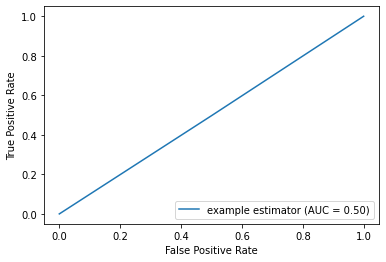

fpr: [0.         0.50157143 1.        ]
tpr: [0.         0.49842857 1.        ]
p_G_evaluated
[6.75567865e-20 6.51869679e-07 1.21779808e-07 ... 4.05629106e-11
 8.71425888e-14 1.02883278e-07]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 1.97567469e-07
 1.10580461e-09 1.97969204e-07]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.741888  0.809300  0.186243  0.859025 -1.018149 -0.874457 -0.723400   
1    1.716725  0.809389 -1.079536 -1.057387  0.772968 -1.764843 -1.555291   
2    0.137361  0.809335  0.185919 -1.056518  0.875209  0.014903  0.112760   
3   -0.213585  0.809659  0.186025 -1.056516  1.286383  0.015392  0.112167   
4    0.130276  0.810161  0.185842 -1.056196  0.199726  0.015041  0.111196   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.825614  0.810113  0.186906  0.857517 -0.623102  0.906125 -1.558876   
496 -1.172443  0.809791  0.185038  0.858506 -0.739295 -0.873669  1

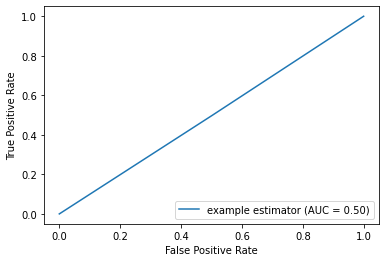

fpr: [0.     0.5019 1.    ]
tpr: [0.     0.4981 1.    ]
p_G_evaluated
[7.22511060e-026 9.69660409e-005 3.16813956e-005 4.16578032e-006
 1.00867763e-009 1.47567788e-004 5.03686301e-020 1.72062449e-007
 3.90024766e-011 2.18109211e-004 1.00772678e-023 2.88262305e-003
 9.84400981e-012 7.73306528e-007 2.54543478e-003 2.03691784e-004
 3.22421154e-013 7.36800276e-020 7.18587922e-009 4.31352975e-008
 9.37509972e-007 2.39920293e-005 5.42019214e-004 3.80573161e-004
 6.36342922e-005 1.70608956e-003 1.95991626e-004 2.63644351e-004
 5.49345688e-004 1.34217812e-006 1.36485498e-011 8.88890931e-006
 1.64528048e-013 6.91480775e-010 1.51241261e-004 7.26301956e-004
 6.34835075e-004 2.89256243e-008 2.09733179e-015 3.29354457e-006
 4.04740822e-026 4.45166595e-005 1.12387826e-005 4.49649305e-004
 2.10660342e-003 3.07458085e-005 2.42390816e-003 6.28140216e-007
 2.64167547e-003 8.16395852e-025 9.72023259e-003 6.90747691e-004
 1.77852845e-005 2.89699960e-004 6.53620781e-036 8.94921658e-004
 7.40281274e-021 9.4

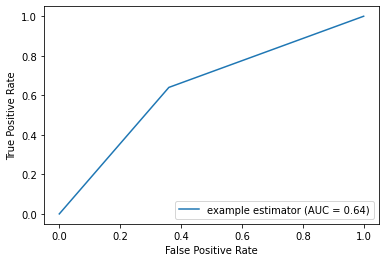

fpr: [0.   0.36 1.  ]
tpr: [0.   0.64 1.  ]
p_G_evaluated
[1.52517889e-041 5.32574054e-005 6.01457416e-005 4.56534669e-007
 2.09635477e-045 5.30463024e-007 3.75139422e-129 7.70005207e-013
 2.26916191e-009 3.47371984e-009 8.34307976e-018 2.76234012e-004
 1.09924831e-009 2.79382917e-011 1.05253698e-004 4.64046459e-006
 1.62131260e-009 3.39665063e-101 6.00753147e-015 9.28141134e-009
 2.50287504e-009 6.47007740e-006 1.87826625e-005 1.19058843e-007
 1.86139475e-005 8.30552604e-005 5.00971921e-006 2.23739748e-006
 1.58360818e-005 7.42036477e-006 1.56918365e-013 5.98917786e-007
 9.64449025e-019 1.40941100e-007 3.42205809e-007 4.34669706e-005
 3.30373216e-009 4.26171955e-013 9.48305139e-027 5.87011509e-007
 1.08101607e-039 2.92492789e-005 2.03365036e-008 3.72033730e-007
 1.53832693e-008 7.27229827e-007 2.38835314e-004 5.41356738e-011
 1.01718224e-004 6.70339999e-012 1.68227343e-003 8.98846329e-005
 7.57909801e-008 1.45842473e-004 1.12227022e-058 9.40201298e-005
 6.07702574e-021 7.83253848e-009

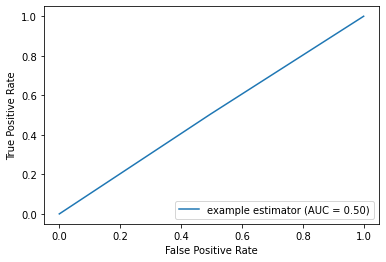

fpr: [0.    0.496 1.   ]
tpr: [0.    0.504 1.   ]
p_G_evaluated
[7.92283815e-67 3.57274265e-05 2.28238415e-06 ... 1.12861575e-13
 6.31350849e-11 2.02313742e-09]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 1.37183021e-10
 3.96664044e-09 2.26722608e-12]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.213794  0.805820  0.184762  0.858925  1.925712  0.900996  1.762696   
1   -0.802544 -1.234323  0.184487  0.859780 -0.737105  2.595814  1.791236   
2   -0.979275 -1.234323  0.183062 -1.053393  0.938951  0.014208  0.113780   
3    1.512880 -1.234323 -1.075527 -1.054643  0.873868 -0.870107  0.111971   
4    0.784975  0.810161 -1.079457  0.862084 -1.126105  0.015281  0.109544   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.588563 -1.233597 -1.071293  0.855506 -0.675061  0.017367  0.110568   
496 -0.867639  0.807112  0.184396  0.856695 -0.864043 -0.869902 -0.721006   
497 -0.018102  0.81

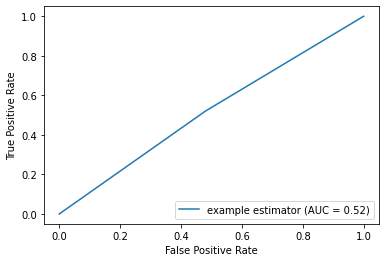

fpr: [0.   0.48 1.  ]
tpr: [0.   0.52 1.  ]
p_G_evaluated
[1.07402674e-25 4.76346429e-06 1.03985993e-06 ... 1.22982305e-08
 1.02853765e-20 2.14330295e-06]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 4.26358587e-08
 1.11542872e-14 5.69280296e-06]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.213794  0.808634 -1.077013  0.859575 -0.997418 -0.872812  1.776649   
1   -0.781338 -1.234323  0.184960  0.857838 -0.546450  0.014032  0.112497   
2   -1.081150  0.808820 -1.078827  0.859308 -0.794594  0.903865 -1.550113   
3   -0.915160  0.809184 -1.078742  0.859756 -1.256872  0.015061  0.111773   
4   -0.119786  0.810161 -1.079596  0.860455 -1.443291 -0.874937 -0.726192   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.180821  0.810153  0.187681 -1.059354  1.826591  1.798869  1.776171   
496 -1.068483 -1.234041  0.184204  0.858129 -0.585668  0.015197  0.112130   
497 -0.601027  0.810161  

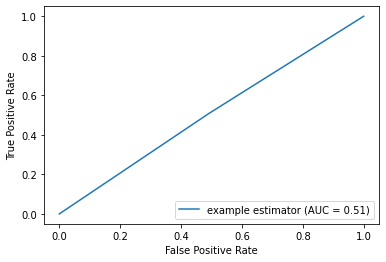

fpr: [0.         0.49166667 1.        ]
tpr: [0.         0.50833333 1.        ]
p_G_evaluated
[2.26389558e-26 1.81633429e-05 5.77020178e-07 ... 2.73730154e-10
 2.45886843e-04 9.64803383e-08]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 8.36805440e-09
 2.07758340e-05 2.08231271e-09]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.076668  0.809240 -1.078199  0.858868  0.367111 -0.874517 -0.723913   
1   -0.886804  0.809231  0.185474  0.858748 -0.547856  0.904517 -1.558876   
2    0.178590  0.809532 -1.079361  0.859252 -0.199136 -0.875342 -0.720950   
3   -1.017953 -1.234054  0.186265  0.859571 -1.293099  0.015480  0.112026   
4   -0.754284  0.810161  0.185701  0.859803 -0.952897  1.794964  1.776453   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.907922  0.810161  0.187095  0.857722 -1.128075  0.015880  0.110804   
496  0.082786  0.809979  0.184812 -1.057135  0.579568  0.015392  0

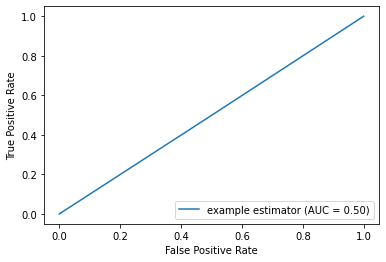

fpr: [0.     0.5008 1.    ]
tpr: [0.     0.4992 1.    ]
p_G_evaluated
[8.94975453e-25 6.31162184e-06 2.67502594e-06 ... 4.00126985e-09
 1.07012997e-04 1.86741224e-07]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 1.11516988e-06
 1.32587019e-05 1.08929324e-06]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.751399  0.809154  0.186135  0.858861 -0.565381  0.014857  0.111498   
1    0.407873  0.809544 -1.079773  0.858252  0.019807 -1.764843 -1.556045   
2   -0.939101  0.809455  1.449920 -1.056100  0.567621  1.793466  1.785273   
3   -0.893379  0.809808  0.186013 -1.056296  1.262119  0.015295  0.112009   
4    0.140266  0.810161  0.185819 -1.056483  0.783679  0.015163  0.110899   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.042724  0.810161 -1.077606  0.856878 -0.152227  0.905699 -0.724899   
496 -1.186692  0.809866  0.184626  0.858593 -1.233538  0.015282  0.112279   
497  1.244748

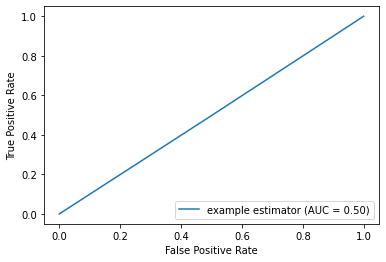

fpr: [0.         0.50128571 1.        ]
tpr: [0.         0.49871429 1.        ]
p_G_evaluated
[4.08833942e-24 8.98830643e-06 2.56067285e-08 ... 1.28812067e-11
 4.33646369e-10 7.74544174e-09]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 1.97567469e-07
 1.10580461e-09 1.97969204e-07]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.948267  0.809361  0.187419 -1.056492  0.053207  0.015022  0.111611   
1    0.416642  0.809545  0.184975  0.858512 -1.039593  0.014491  0.112309   
2   -0.323264  0.809565 -1.079624  0.859097 -1.293977  0.903788 -0.722148   
3   -0.185450  0.809860  0.185834 -1.056364 -0.276252  0.015275  0.112115   
4    0.142208  0.810161 -1.079943 -1.056145 -0.898117 -1.763710 -1.558876   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.978450 -1.233789  0.189881 -1.058550  1.791243  0.906126  1.779456   
496 -0.759954  0.809845  1.442879 -1.064149  1.768685  1.792370  1

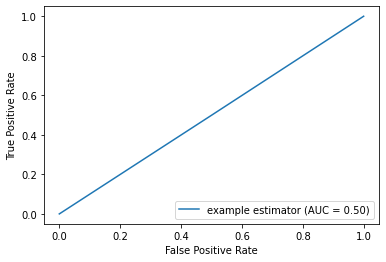

fpr: [0.     0.5005 1.    ]
tpr: [0.     0.4995 1.    ]
p_G_evaluated
[1.39347345e-044 9.75158687e-003 8.86115530e-003 4.86878750e-006
 1.63960386e-035 5.19223828e-005 3.61207267e-061 6.31896059e-004
 2.55241267e-005 3.87140705e-005 1.76567121e-030 6.22252026e-005
 2.83931876e-010 4.65310545e-006 4.80176493e-003 5.13095754e-004
 3.69304692e-016 4.89296027e-013 1.54650508e-007 1.18364422e-008
 2.12999868e-006 1.74846783e-004 2.62008050e-003 4.20054555e-006
 4.80507634e-004 8.03670510e-003 2.95022459e-004 1.09877388e-002
 2.32158229e-004 4.27511139e-007 2.67494420e-007 5.76097902e-004
 2.74464891e-043 1.77254545e-002 1.39053332e-007 4.20873287e-003
 6.19928691e-007 1.29441936e-006 5.92683994e-009 9.78018752e-004
 9.14902748e-038 1.86581722e-004 1.78615889e-008 4.96302410e-005
 1.59248926e-002 2.16051292e-003 7.27490272e-003 5.34101047e-006
 2.72840187e-003 1.27696571e-038 5.92791471e-002 4.94743646e-003
 9.01750915e-004 3.62305638e-003 6.89942072e-137 1.64008070e-003
 1.95572998e-010 1.6

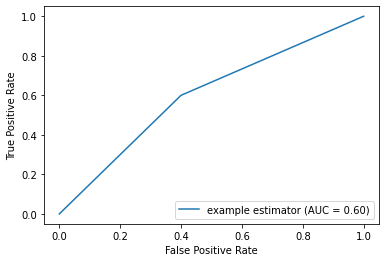

fpr: [0.  0.4 1. ]
tpr: [0.  0.6 1. ]
p_G_evaluated
[2.13145413e-019 5.20037913e-006 7.77180354e-007 3.83165470e-008
 3.98809904e-037 1.04708468e-007 6.83566185e-026 1.61809465e-013
 2.26408499e-009 3.76155866e-010 2.57575592e-015 1.56031331e-006
 1.05469260e-010 6.79467252e-009 2.69067220e-006 1.43222324e-007
 3.36912747e-012 7.83367315e-023 1.29986150e-009 6.39241897e-007
 2.20321694e-011 1.10981260e-006 3.57031410e-007 3.04358598e-008
 1.59118557e-007 3.22001081e-005 1.42641546e-007 1.21482151e-006
 2.88989140e-009 4.48768793e-009 4.64610505e-008 1.82576171e-008
 4.12012951e-015 8.12911200e-009 1.61312819e-007 3.82772127e-006
 7.57048342e-008 7.88177528e-012 4.26534220e-013 1.50046408e-008
 1.97689207e-021 4.25732843e-006 5.33635591e-008 2.29077049e-007
 4.41881198e-008 2.30924305e-007 1.31507606e-005 5.82111710e-011
 1.47125068e-006 2.23657953e-015 1.06295474e-004 2.37450309e-005
 4.16298465e-010 2.41751208e-005 4.54795004e-034 6.16376816e-006
 9.65369633e-028 7.71970399e-011 1.130

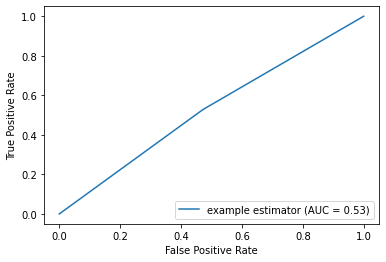

fpr: [0.    0.472 1.   ]
tpr: [0.    0.528 1.   ]
p_G_evaluated
[7.12715390e-81 3.65611370e-06 5.90661378e-08 ... 2.39354337e-14
 4.28856624e-10 6.52476803e-12]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 1.37183021e-10
 3.96664044e-09 2.26722608e-12]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.184092 -1.234323  0.185561  0.857960 -0.732695 -0.874693 -0.721762   
1    0.243514  0.808528  0.183677  0.856019 -0.717927  0.014520  0.113328   
2   -1.034547 -1.234323  0.186987 -1.056338  1.011011  0.014632  0.113987   
3   -0.955676  0.808701  0.187933  0.862394 -1.142113  1.797037  1.786589   
4    1.450894  0.810161 -1.079457  0.857254  0.499565  0.018850  0.109088   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794 -1.231310  0.188407 -1.061319  1.811545 -0.865348 -0.724072   
496 -1.144255  0.808528  0.183124 -1.047433  0.027500  2.988187  2.602082   
497 -0.797344  0.81

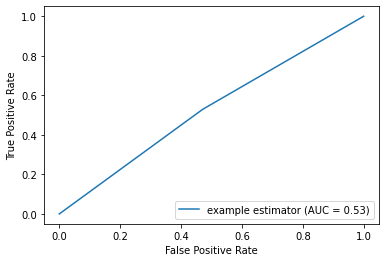

fpr: [0.    0.471 1.   ]
tpr: [0.    0.529 1.   ]
p_G_evaluated
[2.47183919e-18 4.29096325e-05 3.70079668e-06 ... 1.63003918e-07
 4.68362751e-57 2.91757143e-05]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 4.26358587e-08
 1.11542872e-14 5.69280296e-06]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.208662 -1.234323  1.452167 -1.055550  1.799374  0.014513  0.111483   
1    2.277157  0.808289 -1.079726  0.857524 -0.327063 -1.764843 -0.721884   
2   -1.085271  0.808635  0.185645  0.859080 -1.196615  0.901983  1.784515   
3   -0.982469  0.809293 -1.078716  0.859773 -1.263316 -0.872482 -0.721668   
4   -1.163107 -1.230211  1.450463 -1.055782  0.719711  0.014587  0.110608   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794  0.809998  0.187579  0.856522 -1.075791  1.796208  1.777281   
496  1.386394 -1.234323  0.184570 -1.057561  1.666946  0.902127 -1.553862   
497 -0.595766  0.81

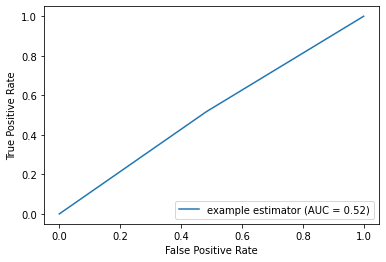

fpr: [0.    0.483 1.   ]
tpr: [0.    0.517 1.   ]
p_G_evaluated
[9.37276749e-20 5.04329704e-06 1.42853300e-07 ... 2.41004826e-11
 4.92846254e-05 6.39048918e-11]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 8.36805440e-09
 2.07758340e-05 2.08231271e-09]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.085513  0.809098  0.186372  0.859254 -0.440476  0.015198  0.111674   
1   -0.873305  0.809168 -1.079054  0.858342 -0.566744  0.903091 -1.553651   
2   -1.130443  0.809018  0.185845  0.859438 -1.271883  0.015074  0.112947   
3    1.155533  0.809561 -1.078963  0.859774 -0.865061  0.015605  0.112280   
4   -0.938550  0.810161  0.186001 -1.055647  0.371286  0.014327  0.111368   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794  0.810042  0.187429  0.855812 -0.582110  1.797199  1.777178   
496  0.752185  0.809674 -1.080837  0.858512  0.006961 -0.873795 -0.721855   
497  0.192259 -1.23

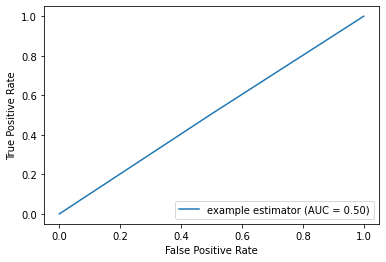

fpr: [0.     0.4972 1.    ]
tpr: [0.     0.5028 1.    ]
p_G_evaluated
[1.46658250e-15 1.12104364e-07 1.80777983e-07 ... 3.35318373e-08
 3.62672213e-06 1.67221107e-08]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 1.11516988e-06
 1.32587019e-05 1.08929324e-06]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.178249  0.809236  0.186385  0.859139 -1.031021  1.794184  1.780954   
1   -0.097823  0.809493  0.185758 -1.057118  1.794714  0.014673  0.112471   
2   -0.702576  0.809593 -1.078990  0.859462 -1.280000  0.014866  0.112636   
3    1.432080  0.809845  0.185925 -1.055821  1.036178  0.015472  0.111898   
4    2.103234  0.810161 -1.079274  0.859753 -0.938704 -1.762357 -1.558876   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.017343  0.810161  1.453787 -1.114152  2.126824 -0.873000 -0.724448   
496  0.092461  0.809974 -1.080664  0.858486  0.250578 -0.873961 -0.722479   
497  1.285715

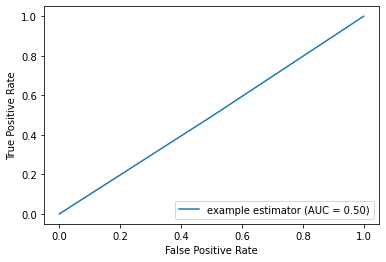

fpr: [0.         0.50357143 1.        ]
tpr: [0.         0.49642857 1.        ]
p_G_evaluated
[7.61363505e-42 4.33476378e-07 6.59967765e-08 ... 3.52967072e-11
 6.83595419e-12 3.00607038e-08]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 1.97567469e-07
 1.10580461e-09 1.97969204e-07]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    1.160861  0.809285  0.187126 -1.056371  1.337993  0.015026  0.111593   
1   -0.549997  0.809446  0.184825 -1.056887 -0.568146 -0.874951 -0.722048   
2   -1.174736  0.809413  0.185545  0.859272 -1.291891  0.014966  0.112665   
3   -0.211328  0.809736  0.185496  0.859319 -0.829030  0.015512  0.112085   
4   -1.177553  0.810161  0.185473  0.859348 -0.994001  0.015208  0.111086   
..        ...       ...       ...       ...       ...       ...       ...   
495  1.015078  0.810098 -1.073039 -1.058023  0.719206 -1.760428 -0.724545   
496  2.185860  0.809780 -1.084818  0.858615 -0.093359  0.015168 -0

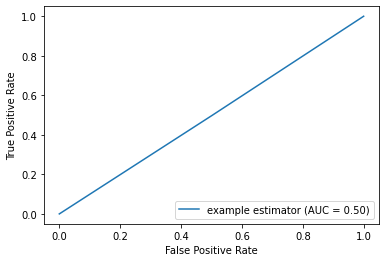

fpr: [0.     0.5018 1.    ]
tpr: [0.     0.4982 1.    ]
p_G_evaluated
[5.45963435e-015 7.48097237e-004 9.35762846e-004 1.65080280e-006
 5.34237239e-029 7.14503369e-003 3.80852912e-028 6.18474548e-007
 1.77197747e-009 5.93613535e-007 1.04040736e-009 4.45343566e-003
 2.83132279e-011 2.51390356e-004 6.37860463e-003 4.84411805e-003
 7.23800691e-012 5.57333097e-017 3.99814020e-009 4.83046286e-009
 1.66459577e-005 8.01691561e-005 2.91544204e-003 4.28478224e-006
 9.21945204e-005 1.37393605e-002 7.43095104e-005 9.79453222e-004
 4.08691957e-003 8.35775387e-008 5.92538007e-008 6.09410466e-004
 2.79657433e-009 2.18967246e-008 6.90113565e-008 6.43108057e-004
 2.11058518e-007 2.64546823e-010 2.14730054e-008 3.01819710e-005
 4.21268920e-034 2.85685974e-006 2.51817645e-004 1.81456361e-004
 1.33367626e-003 2.43780415e-004 1.06517533e-002 3.96026138e-007
 5.53558801e-004 2.42798035e-039 7.55665768e-002 5.80270260e-003
 1.16927361e-003 1.84377583e-002 8.28766358e-047 1.47842265e-002
 5.42966928e-015 1.1

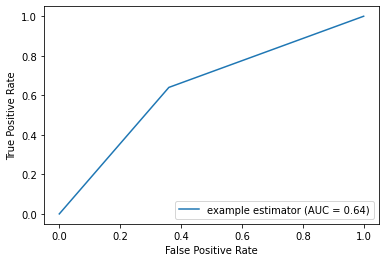

fpr: [0.   0.36 1.  ]
tpr: [0.   0.64 1.  ]
p_G_evaluated
[5.74860001e-014 4.04681061e-006 2.52507074e-007 5.66168908e-008
 2.70600080e-034 3.17078658e-007 1.94429935e-033 1.40312488e-010
 3.20993250e-010 8.56699257e-009 1.03557227e-013 1.96121472e-005
 4.86366599e-017 2.53936362e-007 5.88254511e-006 5.70230472e-007
 1.91391906e-011 2.42870448e-037 6.99074642e-008 1.68091913e-007
 2.37768512e-007 3.11930619e-006 2.26552713e-006 5.51033897e-008
 1.20328759e-007 3.17882156e-005 3.27999742e-007 2.56461312e-007
 1.52250792e-007 1.78538307e-008 4.49728034e-015 1.62913078e-006
 4.55949577e-014 3.93888106e-012 2.96680874e-008 1.94501351e-006
 5.42234950e-008 1.45219314e-015 4.04950641e-010 7.63043347e-009
 4.38040933e-022 2.46513315e-006 1.92722282e-007 1.12462806e-007
 1.52680972e-008 1.25769620e-006 1.02957979e-005 4.66144696e-011
 2.45142513e-006 3.12389908e-013 1.05152232e-004 8.83791494e-006
 8.20823240e-007 3.54031055e-005 3.36811468e-040 1.72929105e-006
 1.76064242e-023 3.68737582e-012

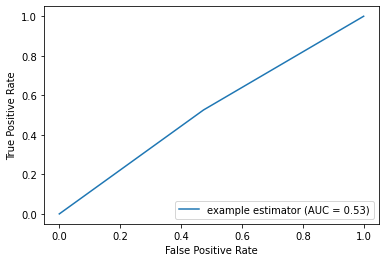

fpr: [0.    0.474 1.   ]
tpr: [0.    0.526 1.   ]
p_G_evaluated
[1.24137541e-44 6.69309424e-06 3.66926310e-07 ... 1.55957370e-12
 4.04483780e-11 4.05450247e-13]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 1.37183021e-10
 3.96664044e-09 2.26722608e-12]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.846525  0.806017  0.185158 -1.054563  1.860936  0.014296  0.112357   
1   -0.049576  0.806319  0.184733  0.844662 -0.642999  0.012225  0.113708   
2   -0.922792  0.806579  0.184626 -1.055252 -0.858822  0.013945  0.114669   
3   -1.002272  0.808297  0.185740  0.864024 -1.146226  0.905891  1.788404   
4    0.791010  0.810161 -1.079457  0.861082 -1.190131  0.014179  0.108010   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.060181  0.810125 -1.074090  0.852951 -0.721160 -0.870539 -0.725117   
496 -1.200497 -1.234028  0.182241  0.857416 -0.816406 -0.871847  1.780994   
497 -0.880765  0.81

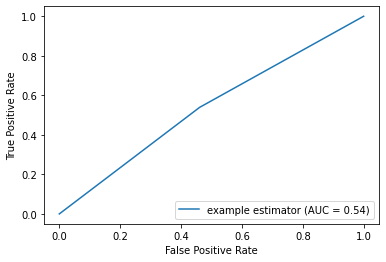

fpr: [0.    0.461 1.   ]
tpr: [0.    0.539 1.   ]
p_G_evaluated
[8.78662835e-23 9.61263890e-06 3.59748844e-07 ... 2.07761819e-08
 1.10609634e-33 1.19703549e-05]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 4.26358587e-08
 1.11542872e-14 5.69280296e-06]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.855994  0.808338  0.186232 -1.056711  2.074912 -0.874597 -0.724198   
1    1.472664  0.808698 -1.080092  0.858665 -0.357690  0.014538  0.113395   
2    0.422623  0.808559 -1.079678  0.859862 -1.221825  0.014587  0.113353   
3   -1.016319  0.809127  0.185391  0.860022 -1.245174  0.015562  0.112140   
4   -0.413464  0.810161  1.449716 -1.056439  0.167613  0.015913  0.111270   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794  0.809863  0.187554  0.857058 -1.098565  0.908586  1.779426   
496  1.271502 -1.234047 -1.081791 -1.056676  1.446227 -0.873887 -0.721426   
497 -0.450638  0.81

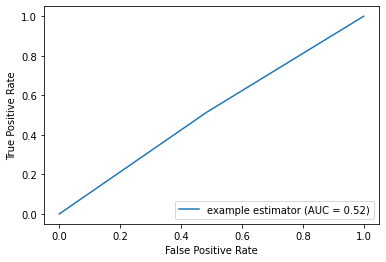

fpr: [0.    0.485 1.   ]
tpr: [0.    0.515 1.   ]
p_G_evaluated
[5.41027968e-25 4.44779300e-07 9.78970218e-09 ... 5.93630220e-11
 4.91233667e-05 3.84801587e-12]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 8.36805440e-09
 2.07758340e-05 2.08231271e-09]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.761776  0.808953  0.186212  0.859097 -0.512319  0.015482  0.111644   
1   -0.962536  0.809111  0.185441  0.858234 -0.628366  1.793201  1.785676   
2    1.879980  0.809087 -1.079220  0.859537 -0.789694 -0.874057 -0.720831   
3   -0.514827  0.809493  0.185813 -1.055810  0.257727  0.015755  0.112202   
4    0.693407  0.810161  0.185685 -1.055757  0.092498  0.015511  0.110638   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.496271 -1.233382  0.187402 -1.059034  2.000028  0.015908  0.110849   
496 -1.077289  0.809640 -1.081228  0.858457 -0.680750  0.015574  0.112219   
497 -1.050113 -1.23

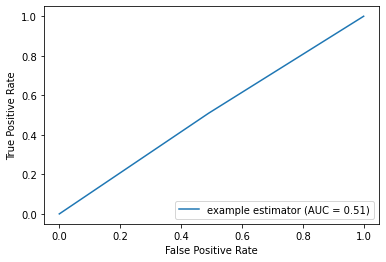

fpr: [0.     0.4906 1.    ]
tpr: [0.     0.5094 1.    ]
p_G_evaluated
[1.77394170e-45 1.43961324e-06 6.95346552e-09 ... 5.25997556e-08
 1.69114628e-05 9.33763476e-08]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 1.11516988e-06
 1.32587019e-05 1.08929324e-06]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    1.019614 -1.234323  0.186503 -1.056579  1.736846 -1.764843 -1.558876   
1   -1.081128  0.809264  0.185633  0.858526 -1.050202  0.014987  0.112803   
2    1.181132  0.809303 -1.079482  0.859336 -0.836707  0.014904  0.112645   
3   -0.902174  0.809726  0.185329  0.859663 -1.305295  0.015373  0.111976   
4    1.035346  0.810161  0.185960 -1.056273  1.030379 -1.762397 -1.558876   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.835571  0.810158 -1.076913  0.857386 -0.622071  0.905727 -0.724909   
496 -0.320192  0.809791  0.184277 -1.056768  0.327395  1.794565  0.112814   
497  1.185684

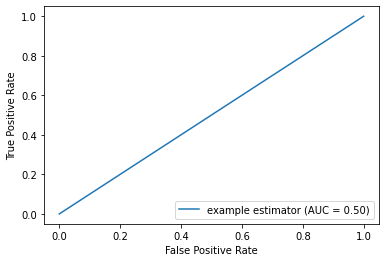

fpr: [0.         0.49985714 1.        ]
tpr: [0.         0.50014286 1.        ]
p_G_evaluated
[8.62272052e-25 9.73678358e-07 6.94834614e-08 ... 7.04679850e-13
 1.06039460e-11 7.91083194e-09]
p_R_evaluated
[2.36544547e-18 1.99403620e-06 3.61028773e-06 ... 1.97567469e-07
 1.10580461e-09 1.97969204e-07]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    2.261422  0.809201 -1.078831  0.859107 -0.502079  0.014865  0.111473   
1   -0.854023  0.809346  0.185488 -1.057328  1.930292  1.785574  2.608793   
2    0.176336  0.809399  0.185659 -1.056561  0.417450 -0.875127 -0.721913   
3   -0.165696  0.809568  0.185497 -1.056595  0.069220  1.796116  1.783149   
4    1.285722 -1.232214  0.185559 -1.056404  1.038692  0.015124  0.111399   
..        ...       ...       ...       ...       ...       ...       ...   
495  1.067748  0.810027 -1.084154  0.857728 -0.582456 -0.873886 -0.724686   
496 -0.948295  0.809670  1.448166 -1.057298  1.476443  0.015111  0

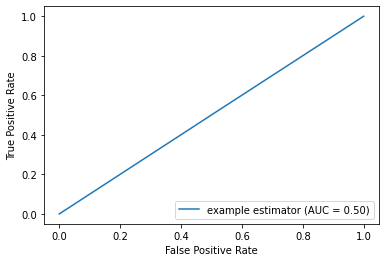

fpr: [0.     0.4996 1.    ]
tpr: [0.     0.5004 1.    ]
Iteration 1:
Training Size 100:
Training Epoch 2000: MIA Performance = {'ablated_eq1': {'accuracy': 0.6, 'aucroc': 0.6238}, 'ablated_eq2': {'accuracy': 0.64, 'aucroc': 0.6809}, 'LOGAN_D1': {'accuracy': 0.51, 'aucroc': 0.5134000000000001}, 'MC': {'accuracy': 0.63, 'aucroc': 0.64015}, 'gan_leaks': {'accuracy': 0.63, 'aucroc': 0.6421999999999999}, 'gan_leaks_cal': {'accuracy': 0.64, 'aucroc': 0.7127}, 'LOGAN_0': {'accuracy': 0.52, 'aucroc': 0.521}, 'eq1': {'accuracy': 0.6, 'aucroc': 0.6238}, 'domias': {'accuracy': 0.63, 'aucroc': 0.6565000000000001}}

Training Size 500:
Training Epoch 2000: MIA Performance = {'ablated_eq1': {'accuracy': 0.512, 'aucroc': 0.510004}, 'ablated_eq2': {'accuracy': 0.52, 'aucroc': 0.519888}, 'LOGAN_D1': {'accuracy': 0.502, 'aucroc': 0.502136}, 'MC': {'accuracy': 0.538, 'aucroc': 0.5280600000000001}, 'gan_leaks': {'accuracy': 0.538, 'aucroc': 0.529644}, 'gan_leaks_cal': {'accuracy': 0.546, 'aucroc': 0.544848

In [8]:
def get_generator(
    gan_method: str = "CTGAN",
    epochs: int = 1000,
    seed: int = 0,
) -> GeneratorInterface:
    class LocalGenerator(GeneratorInterface):
        def __init__(self) -> None:
            if gan_method == "TVAE":
                syn_model = TVAESynthesizer(metadata, epochs=epochs)
            elif gan_method == "CTGAN":
                syn_model = CTGAN(epochs=epochs)
            elif gan_method == "KDE":
                syn_model = None
            else:
                raise RuntimeError()
            self.method = gan_method
            self.model = syn_model
                

        def fit(self, data: pd.DataFrame) -> "LocalGenerator":
            if self.method == "KDE":
                self.model = stats.gaussian_kde(np.transpose(data))
            else:
                self.model.fit(data)
            return self

        def generate(self, count: int) -> pd.DataFrame:
            
            if gan_method == "KDE":
                samples = pd.DataFrame(self.model.resample(count).transpose(1, 0))
            elif gan_method == "TVAE":
                samples = self.model.sample(count)
            elif gan_method == "CTGAN":
                samples = self.model.generate(count)
            else:
                raise RuntimeError()

            return samples
            
            #return self.model.sample(count)

    return LocalGenerator()


#Loading metadata from dataset for use in TVAESynthesizer
dataset = get_dataset()
df_dataset = pd.DataFrame(dataset)
df_dataset.rename(columns={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8:'8', 9:'9', 10:'10', 11:'11', 12:'12',
                          13:'13', 14:'14', 15:'15', 16:'16', 17:'17', 18:'18', 19:'19', 20:'20', 21:'21', 22:'22', 23:'23'}, inplace = True)

from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df_dataset)






"""
Args:
    generator: GeneratorInterface
        Generator with the `fit` and `generate` methods. The generator MUST not be fitted.
    dataset: int
        The evaluation dataset, used to derive the training and test datasets.
    training_size: int
        The split for the training (member) dataset out of `dataset`
    reference_size: int
        The split for the reference dataset out of `dataset`.
    training_epochs: int
        Training epochs
    synthetic_sizes: List[int]
        For how many synthetic samples to test the attacks.

"""

"""
CTGAN Args:

embedding_dim: int = 128,
generator_dim: Tuple = (256, 256),
discriminator_dim: Tuple = (256, 256),
generator_lr: float = 2e-4,
generator_decay: float = 1e-6,
discriminator_lr: float = 2e-4,
discriminator_decay: float = 1e-6,
batch_size: int = 500,
discriminator_steps: int = 1,
log_frequency: bool = True,
verbose: bool = False,
epochs: int = 300,
pac: int = 1,
cuda: bool = True,



"""


# mem_set_size = 1000 -> originally what training size was
reference_set_size = 10000 #held out set
training_epochs = [2000]
training_sizes = [100, 500, 1000, 3000, 5000, 7000, 10000]
#synthetic_sizes = [200]
density_estimator = "kde"  # prior, kde, bnaf
gen_size = 500 #same as synthetic_sizes

method = "TVAE"

# Create a dictionary to store the results
results = {}

# Set the number of iterations
num_iterations = 5

for iteration in range(1, num_iterations+1):
    # Initialize the result dictionary for the current iteration
    iteration_results = {}
    
    for training_size in training_sizes:
        # Initialize the result dictionary for the current training size
        size_results = {}
        
        for training_epoch in training_epochs:
            generator = get_generator(
                gan_method=method,
                epochs=training_epoch,
            )
    
            perf = evaluate_performance(
                generator,
                dataset,
                training_size,
                reference_set_size,
                training_epochs=training_epoch,
                synthetic_sizes=[gen_size],
                density_estimator=density_estimator,
            )
            
            # Store the MIA performance for the current training size and epoch
            size_results[training_epoch] = perf[gen_size]["MIA_performance"]
        
        # Store the results for the current training size
        iteration_results[training_size] = size_results
    
    # Store the results for the current iteration
    results[iteration] = iteration_results

# Print the results
for iteration, iteration_results in results.items():
    print(f"Iteration {iteration}:")
    for training_size, size_results in iteration_results.items():
        print(f"Training Size {training_size}:")
        for training_epoch, mia_performance in size_results.items():
            print(f"Training Epoch {training_epoch}: MIA Performance = {mia_performance}")
        print()


In [9]:
reference_set_size = reference_set_size
training_epoch = training_epochs[0]
gen_size = gen_size

training_output = pd.DataFrame([], columns=["iteration", "epoch", "training_size", "reference_size", "gen_size", "src", "aucroc"])

for iteration in range(1, num_iterations + 1):
    for training_size in training_sizes:
        training_size_res = results[iteration][training_size][training_epoch]
        perf = training_size_res  # Assuming perf is the correct value for accuracy

        for key in perf:
            training_output = pd.concat(
                [
                    training_output,
                    pd.DataFrame(
                        [
                            [iteration, training_epoch, training_size, reference_set_size, gen_size, key, perf[key]["aucroc"]]
                        ],
                        columns=["iteration", "epoch", "training_size", "reference_size", "gen_size", "src", "aucroc"],
                    ),
                ]
            )
training_output

,iteration,epoch,training_size,reference_size,gen_size,src,aucroc
0,1,2000,100,10000,500,ablated_eq1,0.623800
0,1,2000,100,10000,500,ablated_eq2,0.680900
0,1,2000,100,10000,500,LOGAN_D1,0.513400
0,1,2000,100,10000,500,MC,0.640150
0,1,2000,100,10000,500,gan_leaks,0.642200
...,...,...,...,...,...,...,...
0,5,2000,10000,10000,500,gan_leaks,0.499915
0,5,2000,10000,10000,500,gan_leaks_cal,0.502594
0,5,2000,10000,10000,500,LOGAN_0,0.496145
0,5,2000,10000,10000,500,eq1,0.497252


In [10]:
#results df to csv
training_output.to_csv('kde_training_size_output_UCI_TVAE_fix.csv')